In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set(style="white")

## Amenity Count vs Popularity (reviews per month) for LA listings
#### Goals for this step
- Plot amenity count vs reviews per month to see if there is a relationship between the most popular AirBnB listings and number of amenities

In [2]:
df = pd.read_csv("C:/Users/Admin/Documents/ironhack/AirBnB_data/LA_Listings.csv", encoding = "ISO-8859-1", low_memory=False)

In [3]:
df.columns

Index(['Listing ID', 'Name', 'Host ID', 'Host Name', 'Host Response Rate',
       'Host Is Superhost', 'Host total listings count', 'Street', 'City',
       'Neighbourhood cleansed', 'State', 'Country', 'latitude', 'longitude',
       'Property type', 'Room type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Amenities', 'Price', 'Minimum nights', 'Maximum nights',
       'Availability 365', 'Calendar last scraped', 'Number of reviews',
       'Last Review Date', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Reviews per month'],
      dtype='object')

In [4]:
df = df[['Listing ID', 'Host ID', 'Host Response Rate',
       'Host Is Superhost', 'Host total listings count', 'City',
       'Neighbourhood cleansed', 'State', 'Country', 'latitude', 'longitude',
       'Property type', 'Room type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Amenities', 'Price', 'Minimum nights', 'Maximum nights',
       'Availability 365', 'Calendar last scraped', 'Number of reviews',
       'Last Review Date', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Reviews per month']]

In [5]:
df.head()

,Listing ID,Host ID,Host Response Rate,Host Is Superhost,Host total listings count,City,Neighbourhood cleansed,State,Country,latitude,...,Number of reviews,Last Review Date,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per month
0,11085215,57460111,NaN,False,3.0,Los Angeles,West Puente Valley,CA,United States,34.05689088,...,0,NaN,0,0,0,0,0,0,0,0.00
1,3230382,15878447,1.0,True,9.0,Los Angeles,Monterey Park,CA,United States,34.06032707,...,38,12/28/16,95,10,9,9,10,10,9,1.11
2,18211034,125720858,1.0,False,1.0,Los Angeles,Hawthorne,CA,United States,33.92183162,...,0,NaN,0,0,0,0,0,0,0,0.00
3,12209039,38037399,1.0,False,2.0,Los Angeles,Diamond Bar,CA,United States,34.0275231,...,0,NaN,0,0,0,0,0,0,0,0.00
4,10339306,52290241,0.0,False,1.0,Los Angeles,Temple City,CA,United States,34.09453005,...,1,7/23/16,100,10,10,10,10,10,10,0.11


First we will look at the null values on this data set and try to remove information that is not needed.

In [6]:
df.isnull().sum(axis = 0)


Listing ID                         0
Host ID                            0
Host Response Rate             34241
Host Is Superhost                  0
Host total listings count         14
City                               0
Neighbourhood cleansed             0
State                              0
Country                            0
latitude                           0
longitude                          0
Property type                      0
Room type                          0
Accommodates                   28717
Bathrooms                      28813
Bedrooms                       28717
Amenities                      29142
Price                              0
Minimum nights                     0
Maximum nights                 28717
Availability 365                   0
Calendar last scraped          28717
Number of reviews                  0
Last Review Date               13832
Review Scores Rating               0
Review Scores Accuracy             0
Review Scores Cleanliness          0
R

Since our main focus is the amenity count, we will remove rows that have null values for amenities.

In [7]:
df = df.loc[~df["Amenities"].isnull()].reset_index(drop=True)

In [8]:
df.isnull().sum(axis = 0)


Listing ID                        0
Host ID                           0
Host Response Rate             5314
Host Is Superhost                 0
Host total listings count        14
City                              0
Neighbourhood cleansed            0
State                             0
Country                           0
latitude                          0
longitude                         0
Property type                     0
Room type                         0
Accommodates                      0
Bathrooms                        74
Bedrooms                          0
Amenities                         0
Price                             0
Minimum nights                    0
Maximum nights                    0
Availability 365                  0
Calendar last scraped             0
Number of reviews                 0
Last Review Date               6876
Review Scores Rating              0
Review Scores Accuracy            0
Review Scores Cleanliness         0
Review Scores Checkin       

We will look at a general overview of the reviews per month.

In [9]:
df["Reviews per month"].describe()

count    30723.000000
mean         1.452839
std          1.952038
min          0.000000
25%          0.070000
50%          0.690000
75%          2.140000
max         90.000000
Name: Reviews per month, dtype: float64

We will look at listings that have 1 or more reviews per month, indicating that they had at least one guest per month.

In [10]:
df_reviews_pm = df[df["Reviews per month"] >= 1].reset_index(drop=True)

We will create a column that indicates the number of amenities on each listing.

In [11]:
df_reviews_pm["Amenities_List"] = df_reviews_pm["Amenities"].str.split(";")

In [12]:
df_reviews_pm["Amenities_Count"] = df_reviews_pm["Amenities_List"].str.len()

In [13]:
df_reviews_pm.head()

,Listing ID,Host ID,Host Response Rate,Host Is Superhost,Host total listings count,City,Neighbourhood cleansed,State,Country,latitude,...,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per month,Amenities_List,Amenities_Count
0,3230382,15878447,1.00,True,9.0,Los Angeles,Monterey Park,CA,United States,34.06032707,...,95,10,9,9,10,10,9,1.11,"[Internet, Wireless Internet, Air conditioning...",14
1,17545953,74732009,1.00,False,5.0,Los Angeles,Rowland Heights,CA,United States,33.98801281,...,90,10,9,10,8,9,10,1.18,"[TV, Internet, Wireless Internet, Air conditio...",22
2,10513135,47987624,1.00,False,6.0,Los Angeles,El Monte,CA,United States,34.09355084,...,95,10,10,9,9,10,10,3.03,"[Internet, Wireless Internet, Air conditioning...",17
3,7422793,38884077,1.00,False,2.0,Los Angeles,Hacienda Heights,CA,United States,33.99188283,...,80,6,6,8,8,8,8,1.00,"[Internet, Wireless Internet, Air conditioning...",14
4,4432082,22994518,0.91,False,3.0,Los Angeles,Hacienda Heights,CA,United States,34.00232128,...,84,8,8,9,9,9,9,1.08,"[Wireless Internet, Air conditioning, Pool, Fr...",16


In [14]:
len(df_reviews_pm["Amenities_List"][0])

14

We will now take a look at the top neighbourhoods and will focus on the top 10 neighbourhoods with more listings.

In [15]:
df_reviews_pm["Neighbourhood cleansed"].value_counts().sort_values(ascending=False).head(10)

Venice             1122
Hollywood          1065
Downtown            522
Long Beach          483
Santa Monica        422
West Hollywood      372
Silver Lake         345
Hollywood Hills     325
Mid-Wilshire        303
Koreatown           296
Name: Neighbourhood cleansed, dtype: int64

In [16]:
neighbourhoods = list(df_reviews_pm["Neighbourhood cleansed"].value_counts().sort_values(ascending=False).head(10).index)
neighbourhoods

['Venice',
 'Hollywood',
 'Downtown',
 'Long Beach',
 'Santa Monica',
 'West Hollywood',
 'Silver Lake',
 'Hollywood Hills',
 'Mid-Wilshire',
 'Koreatown']

In [17]:
df_top_n = df_reviews_pm[df_reviews_pm["Neighbourhood cleansed"].isin(neighbourhoods)].reset_index(drop=True)

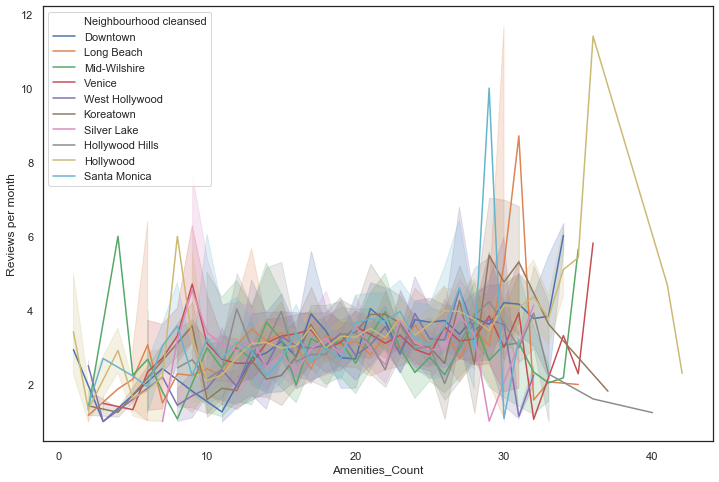

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.lineplot(data=df_top_n,
                 x="Amenities_Count",
                 y="Reviews per month",
                 hue="Neighbourhood cleansed")

The plot for amenities count vs average reviews per month for the top 10 neighbourhoods with more listings looks like the first graphs we plotted for the countries listings. 

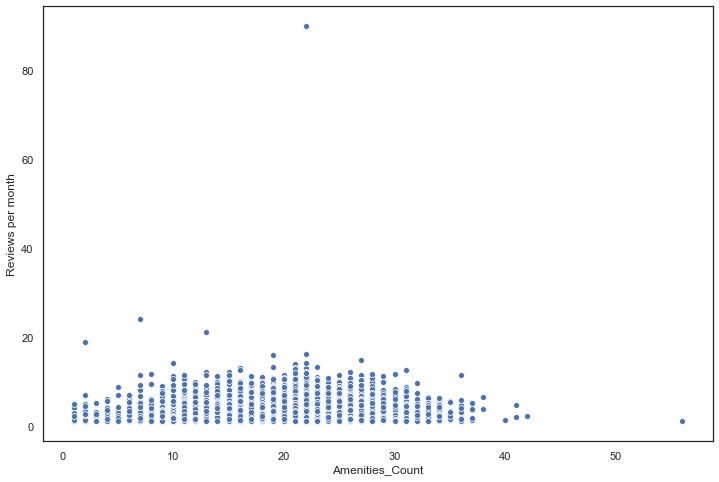

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.scatterplot(data=df_reviews_pm,
                 x="Amenities_Count",
                 y="Reviews per month")

On the scatter plot we can see that there is no clear relationship between the amenities counts and the reviews per month, there seems to be a cluster.

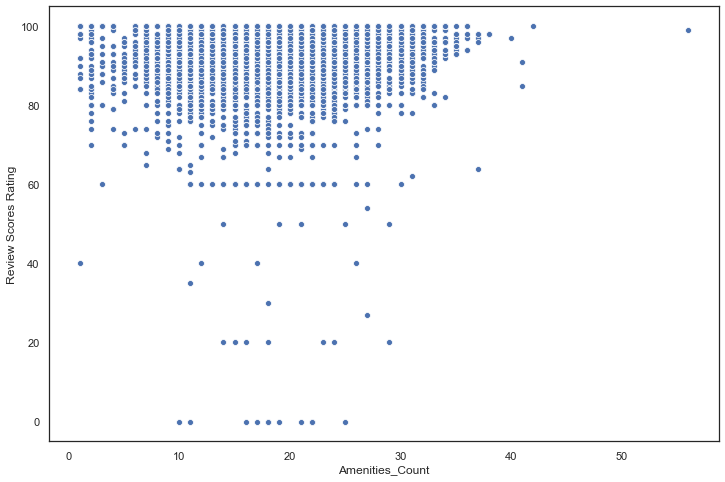

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.scatterplot(data=df_reviews_pm,
                 x="Amenities_Count",
                 y="Review Scores Rating")

The same can bee sen for the number of amenities vs review socres rating, most reviews remein 80 and 100, as well as the first plots made on the amenities vs review score notebook.

We will look at an specific neighbourhood to see if there is a more clear relationship within a higher granularity level. 

In [23]:
df_venice = df_reviews_pm[df_reviews_pm["Neighbourhood cleansed"] == "Venice"].reset_index(drop=True)

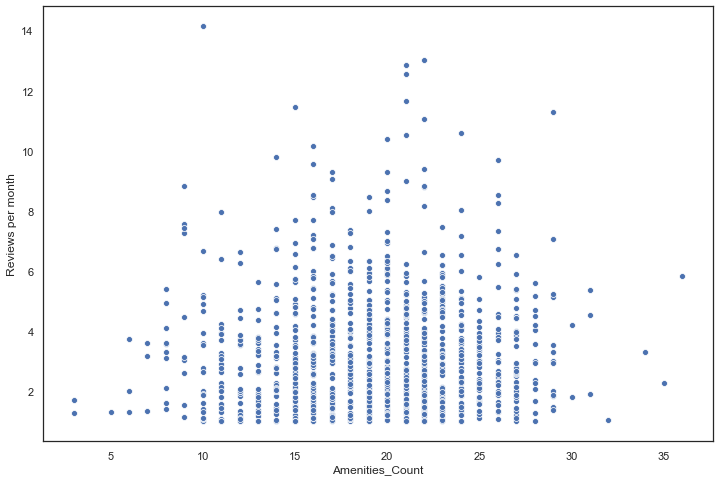

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.scatterplot(data=df_venice,
                 x="Amenities_Count",
                 y="Reviews per month")

There is still no clear relationship between this two variables.